In [377]:
from fenics import *
import matplotlib.pyplot as plt
import numpy as np
from math import *
from mshr import *
from matplotlib import tri
from dolfin import *
import matplotlib.animation as anim

-0.998926702577
0.999939335459
error_L2 = 0.02902829897532047
error_С = 0.00973018509745


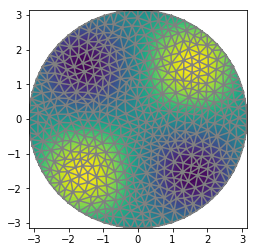

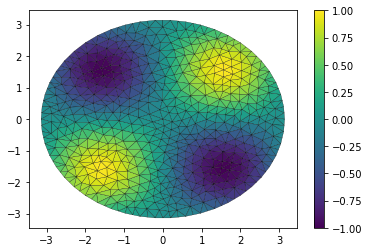

In [444]:
alpha = 0.01
radius = pi
tol = 1E-14

# построение сетки
domain = Circle(Point(0, 0), radius)
mesh = generate_mesh(domain, 16)

boundary_parts = MeshFunction("size_t", mesh, 1)

# линейные элементы на треугольниках
V = FunctionSpace(mesh,'P',1)

# du/dn(y>0) = -g(x,y), on boundary and y>0
class NBoundary(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and x[1] > -tol and (x[0]*x[0] + x[1]*x[1] < radius**2 + tol) and (x[0]*x[0] + x[1]*x[1] > radius**2 - tol)

Gamma_N = NBoundary()
Gamma_N.mark(boundary_parts, 0)

#g = Expression('-cos(x[1])*x[0]/radius + x[0]*sin(x[1])*x[1]/radius', degree=2, radius = radius) #exact_1
#g = Expression('sin(x[0])*sin(x[1])*x[0]/radius - cos(x[0])*cos(x[1])*x[1]/radius', degree=2, radius = radius) #exact_2
g = Expression('-cos(x[0])*sin(x[1])*x[0]/radius - sin(x[0])*cos(x[1])*x[1]/radius', degree=2, radius = radius) #exact_3

class DBoundary(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (x[1] < tol) and (x[0]*x[0] + x[1]*x[1] < radius**2 + tol) and (x[0]*x[0] + x[1]*x[1] > radius**2 - tol)

# u|(y<0) = h(x,y), on boundary and y<0
Gamma_D = DBoundary()
Gamma_D.mark(boundary_parts, 1)
# h(x,y), y<0
#u_D = Expression('x[0]*cos(x[1])',degree = 2)  #exact_1
#u_D = Expression('cos(x[0])*sin(x[1])',degree = 2)  #exact_2
u_D = Expression('sin(x[0])*sin(x[1])',degree = 2)  #exact_3

#def boundary(x, on_boundary):
#    return on_boundary and (x[1] < tol) and (x[0]*x[0] + x[1]*x[1] < radius**2 + tol) and (x[0]*x[0] + x[1]*x[1] > radius**2 - tol)

#f = Expression('(1+alpha)*x[0]*cos(x[1])', degree=2, alpha = alpha)  #exact_1
#f = Expression('(2+alpha)*cos(x[0])*sin(x[1])', degree=2, alpha = alpha)  #exact_2
f = Expression('(2+alpha)*sin(x[0])*sin(x[1])', degree=2, alpha = alpha)  #exact_3

bc = DirichletBC(V,u_D,boundary_parts,1)
#bc = DirichletBC(V,u_D,boundary)
u = TrialFunction(V)
v = TestFunction(V)

a = dot(grad(u),grad(v))*dx + alpha*dot(u,v)*dx
L = f*v*dx - g*v*ds(0,subdomain_data = boundary_parts)

u = Function(V)
solve(a==L, u, bc)

# Compute solution
#A = assemble(a)
#b = assemble(L)
#bc.apply(A, b)

#u = Function(V)
#solve(A, u.vector(), b, 'lu')

error_L2 = errornorm(u_D, u, 'L2')
vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u =u.compute_vertex_values(mesh)

error_C = np.max(np.abs(vertex_values_u - vertex_values_u_D))

print(min(vertex_values_u_D))
print(max(vertex_values_u_D))
print('error_L2 =', error_L2)
print('error_С =', error_C)
#plot(u)
#plot(mesh)
u_e = interpolate(u_D, V)
plot(u_e)
plot(mesh)


n = mesh.num_vertices()
d = mesh.geometry().dim()
mesh_coordinates = mesh.coordinates().reshape((n,d))
triangles = np.asarray([cell.entities(0) for cell in cells(mesh)])
triangulation = tri.Triangulation(mesh_coordinates[:,0],mesh_coordinates[:,1],triangles)
plt.figure()
zfaces = np.asarray([u(cell.midpoint()) for cell in cells(mesh)])
plt.tripcolor(triangulation, facecolors=zfaces, edgecolors='k')
plt.clim(-1,1) 
plt.colorbar()
plt.savefig('u_near3.png')

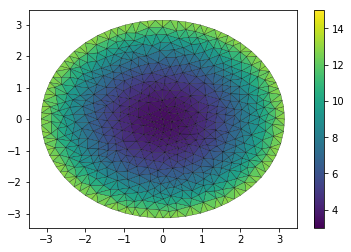

In [384]:
n = mesh.num_vertices()
d = mesh.geometry().dim()
mesh_coordinates = mesh.coordinates().reshape((n,d))
triangles = np.asarray([cell.entities(0) for cell in cells(mesh)])
triangulation = tri.Triangulation(mesh_coordinates[:,0],mesh_coordinates[:,1],triangles)
plt.figure()
zfaces = np.asarray([u(cell.midpoint()) for cell in cells(mesh)])
plt.tripcolor(triangulation, facecolors=zfaces, edgecolors='k')
plt.clim(min(vertex_values_u),max(vertex_values_u)) 
plt.colorbar()
plt.savefig('u_midpoint.png')

1.24
11.1096044011
t= 0.2 , error_C =  0.0185348050295
t= 0.2 , error_L2 =  0.01547415180341947 

1.48
11.3496044011
t= 0.4 , error_C =  0.0198963995177
t= 0.4 , error_L2 =  0.017872938003929705 

1.72
11.5896044011
t= 0.6000000000000001 , error_C =  0.0213199314033
t= 0.6000000000000001 , error_L2 =  0.01979779717173244 

1.96
11.8296044011
t= 0.8 , error_C =  0.022551737886
t= 0.8 , error_L2 =  0.021652498472419776 

2.2
12.0696044011
t= 1.0 , error_C =  0.0235598788772
t= 1.0 , error_L2 =  0.023436019928971808 

2.44
12.3096044011
t= 1.2 , error_C =  0.0244172105641
t= 1.2 , error_L2 =  0.025144341813941526 

2.68
12.5496044011
t= 1.4 , error_C =  0.0251649647368
t= 1.4 , error_L2 =  0.026785166002891332 

2.92
12.7896044011
t= 1.5999999999999999 , error_C =  0.0258296487116
t= 1.5999999999999999 , error_L2 =  0.028371917314681677 

3.16
13.0296044011
t= 1.7999999999999998 , error_C =  0.0264298166134
t= 1.7999999999999998 , error_L2 =  0.02991926893935024 

3.4
13.2696044011
t= 1.9

MovieWriter imagemagick unavailable.


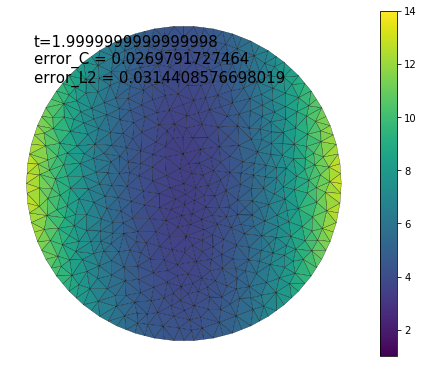

In [438]:
alpha = 1.2
gamma = 0.1
beta = 1.2
radius = pi
tol = 1E-14
T = 2.0
num_steps = 10

dt = T/num_steps

class AnimatedGif:
    def __init__(self, size=(640, 480)):
        self.fig = plt.figure()
        self.fig.set_size_inches(size[0] / 100, size[1] / 100)
        ax = self.fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)
        ax.set_xticks([])
        ax.set_yticks([])
        self.images = []
 
    def add(self, zafces, triangulation, k, label=''):
        plt_im = plt.tripcolor(triangulation, facecolors=zfaces, edgecolors='k')
        plt_txt = plt.text(-3,2,label, color='black', fontsize=15 )
        if (k == 1):
            plt.clim(1,14) 
            plt.colorbar()
        else:
            plt.clim(1,14)
        self.images.append([plt_im, plt_txt])
 
    def save(self, filename):
        animation = anim.ArtistAnimation(self.fig, self.images)
        animation.save(filename, writer='imagemagick', fps=1)

# построение сетки
domain = Circle(Point(0, 0), radius)
mesh = generate_mesh(domain, 16)

boundary_parts = MeshFunction("size_t", mesh, 1)

n = mesh.num_vertices()
d = mesh.geometry().dim()
mesh_coordinates = mesh.coordinates().reshape((n,d))
triangles = np.asarray([cell.entities(0) for cell in cells(mesh)])
triangulation = tri.Triangulation(mesh_coordinates[:,0],mesh_coordinates[:,1],triangles)

# линейные элементы на треугольниках
V = FunctionSpace(mesh,'P',1)

# du/dn(y>0) = -g(x,y), on boundary and y>0
class NBoundary(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and x[1] > -tol and (x[0]*x[0] + x[1]*x[1] < radius**2 + tol) and (x[0]*x[0] + x[1]*x[1] > radius**2 - tol)

Gamma_N = NBoundary()
Gamma_N.mark(boundary_parts, 0)

g = Expression('-2*x[0]*x[0]/radius - 2*gamma*x[1]*x[1]/radius', degree=2, radius = radius, gamma = gamma, beta = beta)

class DBoundary(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (x[1] < tol) and (x[0]*x[0] + x[1]*x[1] < radius**2 + tol) and (x[0]*x[0] + x[1]*x[1] > radius**2 - tol)

# u|(y<0) = h(x,y), on boundary and y<0
Gamma_D = DBoundary()
Gamma_D.mark(boundary_parts, 1)
# h(x,y), y<0
u_D = Expression('1+x[0]*x[0]+gamma*x[1]*x[1]+beta*t',degree = 2, gamma = gamma, beta = beta, t = 0)

#def boundary(x, on_boundary):
#    return on_boundary and (x[1] < tol) and (x[0]*x[0] + x[1]*x[1] < radius**2 + tol) and (x[0]*x[0] + x[1]*x[1] > radius**2 - tol)

f = Expression('beta - 2*alpha*(1+gamma)', degree=2, alpha = alpha, gamma = gamma, beta = beta)

bc = DirichletBC(V,u_D,boundary_parts,1)
#bc = DirichletBC(V,u_D,boundary)
u_n = interpolate(u_D,V)
u = TrialFunction(V)
v = TestFunction(V)

a = alpha*dt*dot(grad(u),grad(v))*dx + u*v*dx
L = (u_n+dt*f)*v*dx - alpha*dt*g*v*ds(0,subdomain_data = boundary_parts)
#a, L = lhs(F), rhs(F)

u = Function(V)
t = 0
k = 1
animated_gif = AnimatedGif()
for n in range(num_steps):
    t+= dt
    u_D.t = t
    solve(a==L, u, bc)
    #plot(u)
    zfaces = np.asarray([u(cell.midpoint()) for cell in cells(mesh)])
    u_e = interpolate(u_D,V)
    vertex_values_u_e = u_e.compute_vertex_values(mesh)
    vertex_values_u =u.compute_vertex_values(mesh)
    print(min(vertex_values_u_e))
    print(max(vertex_values_u_e))
    error_C = np.max(np.abs(vertex_values_u - vertex_values_u_e))
    print('t=', t, ', error_C = ', error_C)
    error_L2 = errornorm(u_e, u, 'L2')
    print('t=', t, ', error_L2 = ', error_L2,'\n')
    animated_gif.add(zfaces, triangulation, k, label= 't=' + str(t)+'\n' + 'error_C = ' + str(error_C) +'\n' + 'error_L2 = ' + str(error_L2))
    k += 1
    u_n.assign(u)
animated_gif.save('analytic_Solve-animated_alpha1_2_gamma0_1_beta1_2.gif')
